Group 12 - Harinarayan J (23110128), Vyomika Vasireddy (23110363)

In [ ]:
# Imports

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Loading the data

iris = load_iris()
X = iris["data"]
Y = iris["target"]

# Labeling the data

label = []
for i in range(len(Y)):
    if Y[i] == 0:
        label.append("setosa")
    elif Y[i] == 1:
        label.append("versicolor")
    else:
        label.append("virginica")

# Normalizing

X_ = X/ X.max(axis=0)

In [ ]:
# Splitting the data

X_train, X_test_, Y_train, Y_test_ = train_test_split(X_, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_test_, Y_test_, test_size=0.33, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)

(105, 4) (30, 4) (15, 4)


In [ ]:
# Imports and setting up for model

import torch
from torch import nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch import tensor
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# MLP Classifier with 4 neurons for four features (input), 16  neurons with ReLu activation function (hidden layer), and 3 neurons with softmax activation function (output layer)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.l1 = nn.Linear(4, 16)
        self.activation = nn.ReLU()
        self.l2 = nn.Linear(16, 3)
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.l1(x)
        x = self.activation(x)
        x = self.l2(x)
        x = self.softmax(x)
        return x


In [ ]:
# Initializing the model

model = MLP().to(device)
op = Adam(model.parameters(), lr=0.001)
loss = CrossEntropyLoss()

In [ ]:
# Setting up the data for training, validation, and testing

X_t_m = tensor(X_train, dtype = torch.float32)
Y_t_m = tensor(Y_train)

t_d = TensorDataset(X_t_m, Y_t_m)
t_l = DataLoader(t_d, batch_size=32, shuffle=True)

v_d = TensorDataset(tensor(X_val, dtype = torch.float32), tensor(Y_val))
v_l = DataLoader(v_d, batch_size=32, shuffle=True)

t_d = TensorDataset(tensor(X_test, dtype = torch.float32), tensor(Y_test))
t_l = DataLoader(t_d, batch_size=32, shuffle=True)

In [ ]:
# Training the model with 50 epochs

epochs = 50
model.train()

t_loss = []
v_loss = []

for epoch in range(epochs):
    l = 0.0
    va_l = 0.0
    model.train()

    for i , j in t_l:

        i, j = i.to(device), j.to(device, dtype=torch.long)
        op.zero_grad()
        o = model(i)

        lo_ = loss(o, j)
        lo_.backward()
        op.step()
        l += lo_.item()

    avg_l = l/len(t_l)
    t_loss.append(avg_l)

    model.eval()
    with torch.no_grad():
        for i, j in v_l:
            i, j = i.to(device), j.to(device, dtype=torch.long)
            o = model(i)
            va_l += loss(o, j).item()
        avg_vl = va_l/len(v_l)
        v_loss.append(avg_vl)

    print(f"Epoch: {epoch+1}, Training Loss: {avg_l}, Validation Loss: {avg_vl}")

Epoch: 1, Training Loss: 0.9997407793998718, Validation Loss: 1.0406664609909058
Epoch: 2, Training Loss: 0.9990024566650391, Validation Loss: 1.0391120910644531
Epoch: 3, Training Loss: 0.9982597231864929, Validation Loss: 1.0375633239746094
Epoch: 4, Training Loss: 0.9975222945213318, Validation Loss: 1.0360254049301147
Epoch: 5, Training Loss: 0.9967790246009827, Validation Loss: 1.0344884395599365
Epoch: 6, Training Loss: 0.9960280060768127, Validation Loss: 1.0329406261444092
Epoch: 7, Training Loss: 0.9952753186225891, Validation Loss: 1.031387209892273
Epoch: 8, Training Loss: 0.9945138692855835, Validation Loss: 1.0298269987106323
Epoch: 9, Training Loss: 0.9937432408332825, Validation Loss: 1.028283715248108
Epoch: 10, Training Loss: 0.9929643273353577, Validation Loss: 1.026728630065918
Epoch: 11, Training Loss: 0.9921792149543762, Validation Loss: 1.025163173675537
Epoch: 12, Training Loss: 0.9913931488990784, Validation Loss: 1.0235610008239746
Epoch: 13, Training Loss: 0.9

In [ ]:
# Evaluating the model

model.eval()

p = []
l = []

with torch.no_grad():
    for i, j in t_l:
        l.append(j.cpu().numpy())
        i, j = i.to(device), j.to(device, dtype=torch.long)
        o = model(i)

        _, pred = torch.max(o, 1)
        p.append(pred.cpu().numpy())

In [ ]:
# Displaying the metrics

p = np.array(p).flatten()
l = np.array(l).flatten()

print(f"Accuracy: {accuracy_score(p, l)}")
print(f"Precision: {precision_score(p, l, average='weighted')}")
print(f"Recall: {recall_score(p, l, average='weighted')}")
print(f"F1 Score: {f1_score(p, l, average='weighted')}")



Accuracy: 0.7333333333333333
Precision: 0.9466666666666667
Recall: 0.7333333333333333
F1 Score: 0.7925925925925926


<Axes: >

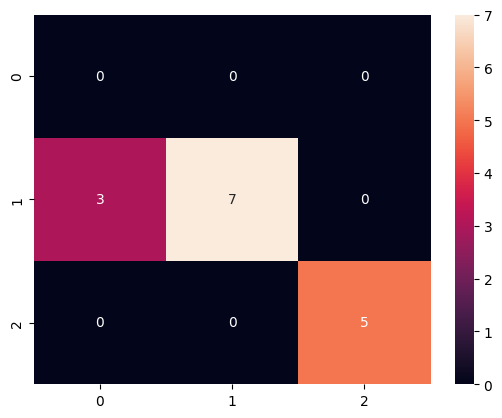

In [ ]:
# Showing the confusion matrix

import seaborn as sns

cm = confusion_matrix(p, l)
sns.heatmap(cm, annot=True)

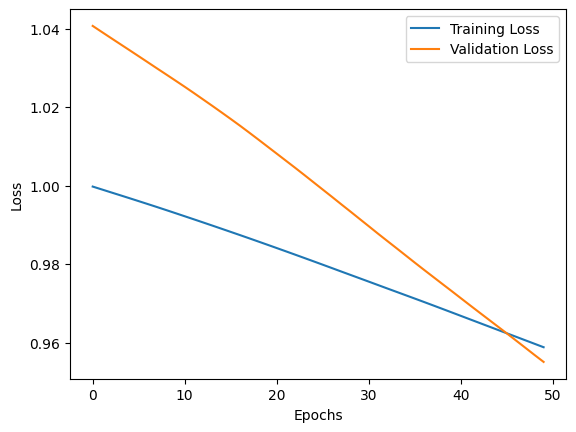

In [ ]:
# PLotting the losses

import matplotlib.pyplot as plt

plt.plot(t_loss, label="Training Loss")
plt.plot(v_loss, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

Experiment Tracking with Weights and Biases

In [ ]:
!wandb login

wandb: Currently logged in as: 23110128 (23110128-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
# Initializing wandb

import wandb

wandb.init(
    project="CS203-Lab6",
    name="Iris-MLP-Run4",


    # track hyperparameters and run metadata
    config={
    "architecture": "MLP",
    "layers": {
        "input": 4,
        "hidden": 16,
        "output": 3
    },
    "dataset": "Iris",
    "Hyperparameters": {
        "Learning Rate": 0.001,
        "Optimizer": "Adam",
        "Loss Function": "CrossEntropyLoss",
        "batch_size": 32,
        "epochs": 50
    },

    "Activation": ["ReLU", "Softmax"],
    }
)

Re-using code from above to implement wandb based tracking

In [ ]:
# Training the model with 50 epochs

epochs = 50
model.train()

t_loss = []
v_loss = []

for epoch in range(epochs):
    l = 0.0
    va_l = 0.0
    model.train()

    for i , j in t_l:

        i, j = i.to(device), j.to(device, dtype=torch.long)
        op.zero_grad()
        o = model(i)

        lo_ = loss(o, j)
        lo_.backward()
        op.step()
        l += lo_.item()

    avg_l = l/len(t_l)
    t_loss.append(avg_l)

    model.eval()
    with torch.no_grad():
        for i, j in v_l:
            i, j = i.to(device), j.to(device, dtype=torch.long)
            o = model(i)
            va_l += loss(o, j).item()
        avg_vl = va_l/len(v_l)
        v_loss.append(avg_vl)

    wandb.log({"Training Loss": avg_l, "Validation Loss": avg_vl})
    print(f"Epoch: {epoch+1}, Training Loss: {avg_l}, Validation Loss: {avg_vl}")

# Evaluating the model

model.eval()

p = []
l = []

with torch.no_grad():
    for i, j in t_l:
        l.append(j.cpu().numpy())
        i, j = i.to(device), j.to(device, dtype=torch.long)
        o = model(i)

        _, pred = torch.max(o, 1)
        p.append(pred.cpu().numpy())

p = np.array(p).flatten()
l = np.array(l).flatten()

print(f"Accuracy: {accuracy_score(p, l)}")
print(f"Precision: {precision_score(p, l, average='weighted')}")
print(f"Recall: {recall_score(p, l, average='weighted')}")
print(f"F1 Score: {f1_score(p, l, average='weighted')}")

wandb.log({"Accuracy": accuracy_score(p, l), "Precision": precision_score(p, l, average='weighted'), "Recall": recall_score(p, l, average='weighted'), "F1 Score": f1_score(p, l, average='weighted'),
           "Confusion Matrix": wandb.plot.confusion_matrix(probs=None, y_true=l, preds=p, class_names=["setosa", "versicolor", "virginica"]),
           "loss_curve": wandb.plot.line_series(
               xs = list(range(1, epochs+1)),
                ys = [t_loss, v_loss],
                title = "Loss Curve",
                xname = "Epochs",
                keys = ["Training Loss", "Validation Loss"]
           )})

C:\Users\harin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torch\nn\modules\module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 1, Training Loss: 0.9579241871833801, Validation Loss: 0.953296959400177
Epoch: 2, Training Loss: 0.9570325613021851, Validation Loss: 0.9514797329902649
Epoch: 3, Training Loss: 0.9561405181884766, Validation Loss: 0.9496456384658813
Epoch: 4, Training Loss: 0.9552503228187561, Validation Loss: 0.9478367567062378
Epoch: 5, Training Loss: 0.9543576836585999, Validation Loss: 0.9460816979408264
Epoch: 6, Training Loss: 0.953462541103363, Validation Loss: 0.9443492889404297
Epoch: 7, Training Loss: 0.9525735974311829, Validation Loss: 0.9426121115684509
Epoch: 8, Training Loss: 0.9516857266426086, Validation Loss: 0.9408724308013916
Epoch: 9, Training Loss: 0.9507995247840881, Validation Loss: 0.9391221404075623
Epoch: 10, Training Loss: 0.9499121308326721, Validation Loss: 0.9373932480812073
Epoch: 11, Training Loss: 0.9490253329277039, Validation Loss: 0.9356990456581116
Epoch: 12, Training Loss: 0.9481416344642639, Validation Loss: 0.9339919686317444
Epoch: 13, Training Loss: 0

In [ ]:
wandb.finish()

Accuracy,▁█
F1 Score,▁█
Precision,█▁
Recall,▁█
Training Loss,████▇▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▆▆▆▅▅▅▅▅▅▄▄▃▃▃▂▂▂▁▁
Validation Loss,██████████▇▇▇▇▇▆▆▆▆▆▄▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁
Accuracy,0.93333
F1 Score,0.93481
Precision,0.94667
Recall,0.93333
Training Loss,0.91589


In [54]:
!python --version


Python 3.11.11


Section 2:


In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. 

In [ ]:
# Imports

import pandas as pd
import itertools
import autogluon as ag
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.common as agco

In [ ]:
# Defining the model class

from autogluon.core.models import AbstractModel

class Py(AbstractModel):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.model = MLP()
        self.num_epochs = kwargs.get("num_epochs", 5)
        self.learning_rate = kwargs.get("learning_rate", 0.001)
        self.batch_size = kwargs.get("batch_size", 2)

    def fit(self, X, y, **kwargs):

        X_t = torch.tensor(X.values, dtype=torch.float32)
        y_t = torch.tensor(y.values, dtype=torch.long)

        op = Adam(self.model.parameters(), lr=self.learning_rate)
        loss = CrossEntropyLoss()

        for e in range(self.num_epochs):
            op.zero_grad()
            o = self.model(X_t)
            l = loss(o, y_t)
            l.backward()
            op.step()

    def predict(self, X, **kwargs):
        X_t = torch.tensor(X.values, dtype=torch.float32)
        with torch.no_grad():
            pred = self.model(X_t)
        return pred.numpy()



In [24]:
# Getting the data and setting up the hyperparameters

X = pd.DataFrame(iris["data"], columns=iris["feature_names"])
Y = pd.DataFrame(iris["target"], columns=["target"])

Y_ = iris["feature_names"].copy()
Y_.append(["target"])

X = pd.concat([X, Y], axis=1)

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

X_train.to_csv("train.csv", index=False)
X_test.to_csv("test.csv", index=False)

X_train = TabularDataset("train.csv")
X_test = TabularDataset("test.csv")

batch = [2,4]
lr = [1e-3, 1e-5]
epochs = [1, 3, 5]

In [25]:
# Training the model in each combination

metrics = []
conf = []

for batch_, lr_, e in itertools.product(batch, lr, epochs):

    print(f"Batch Size: {batch_}, Learning Rate: {lr_}, Epochs: {e}")

    params = {
        "NN_TORCH" : {
            "num_epochs": e,
            "learning_rate": lr_,
            "batch_size": batch_,
            "hidden_size": 16,
            "num_layers" : 1,
            "activation" : "relu",
        }
    }

    pr = TabularPredictor(
        label = "target",
        eval_metric = "accuracy",
        path = "model/one",
        verbosity = 0,
        log_to_file = True,
        log_file_path = "./log"
    )

    print("Training")
    pr.fit(train_data = X_train, hyperparameters = params, time_limit=700, presets="medium_quality")

    t = X_test["target"]
    pre = pr.predict(X_test)

    acc = accuracy_score(t, pre)
    f1 = f1_score(t, pre, average="weighted")

    print(f"Accuracy: {acc}, F1 Score: {f1}")
    metrics.append({"batch": batch_, "lr": lr_, "epochs": e, "accuracy": acc, "f1": f1})

    c = confusion_matrix(t, pre)
    conf.append(c)

metrics_df = pd.DataFrame(metrics)

Batch Size: 2, Learning Rate: 0.001, Epochs: 1
Training
Accuracy: 0.6, F1 Score: 0.5155555555555555
Batch Size: 2, Learning Rate: 0.001, Epochs: 3
Training
Accuracy: 0.6666666666666666, F1 Score: 0.564935064935065
Batch Size: 2, Learning Rate: 0.001, Epochs: 5
Training
(autoscaler +17m3s) Error: No available node types can fulfill resource request {'CPU': 96.0}. Add suitable node types to this cluster to resolve this issue.
Accuracy: 0.6666666666666666, F1 Score: 0.564935064935065
Batch Size: 2, Learning Rate: 1e-05, Epochs: 1
Training
Accuracy: 0.0, F1 Score: 0.0
Batch Size: 2, Learning Rate: 1e-05, Epochs: 3
Training
Accuracy: 0.0, F1 Score: 0.0
Batch Size: 2, Learning Rate: 1e-05, Epochs: 5
Training
Accuracy: 0.0, F1 Score: 0.0
Batch Size: 4, Learning Rate: 0.001, Epochs: 1
Training
Accuracy: 0.3333333333333333, F1 Score: 0.2230769230769231
Batch Size: 4, Learning Rate: 0.001, Epochs: 3
Training
Accuracy: 0.6666666666666666, F1 Score: 0.5598290598290598
Batch Size: 4, Learning Rate:

In [28]:
metrics_df

,batch,lr,epochs,accuracy,f1
0,2,0.00100,1,0.600000,0.515556
1,2,0.00100,3,0.666667,0.564935
2,2,0.00100,5,0.666667,0.564935
3,2,0.00001,1,0.000000,0.000000
4,2,0.00001,3,0.000000,0.000000
5,2,0.00001,5,0.000000,0.000000
6,4,0.00100,1,0.333333,0.223077
7,4,0.00100,3,0.666667,0.559829
8,4,0.00100,5,0.700000,0.581191
9,4,0.00001,1,0.000000,0.000000


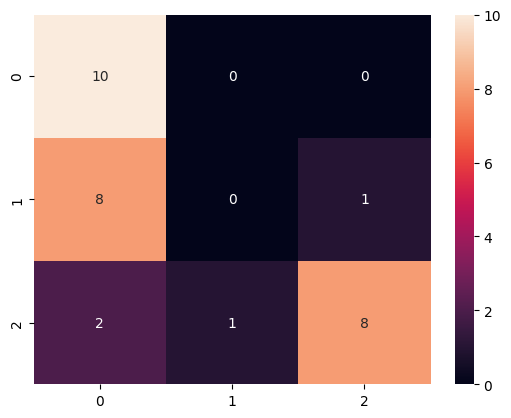

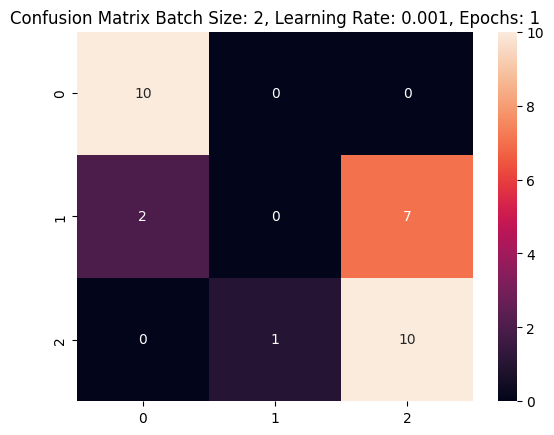

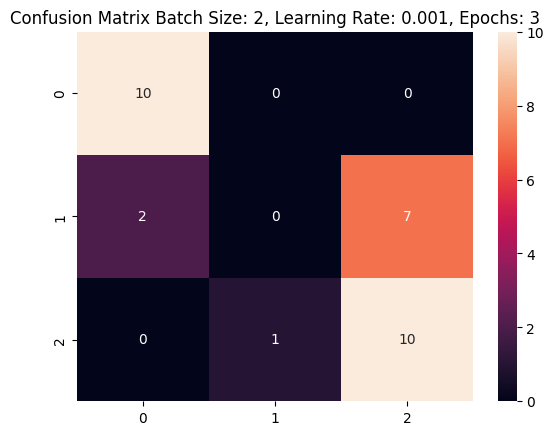

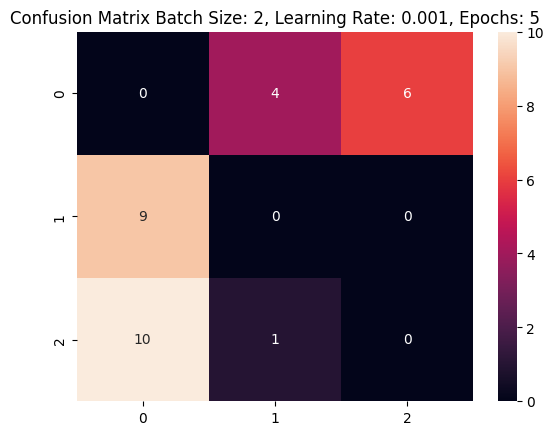

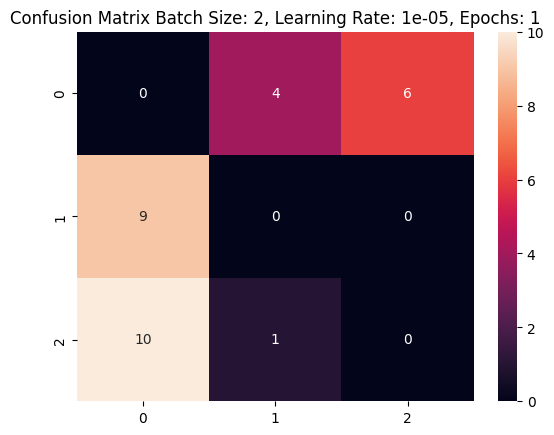

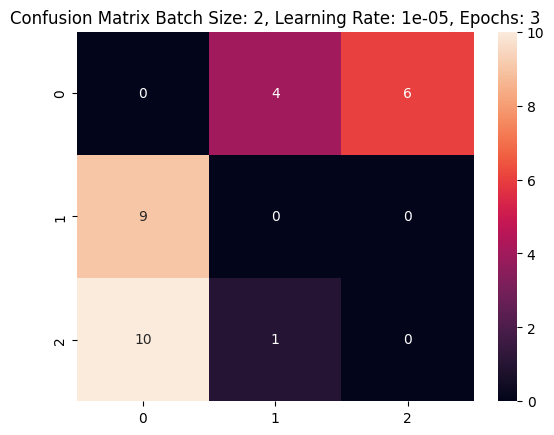

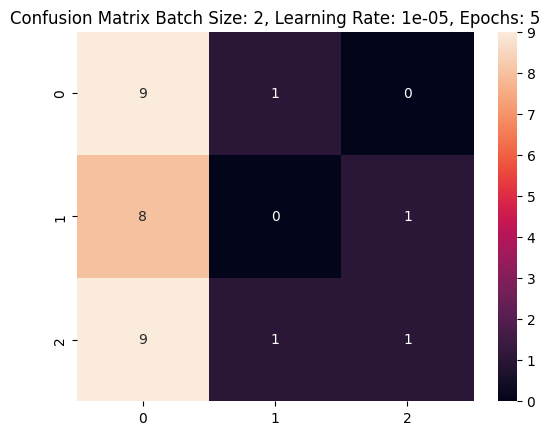

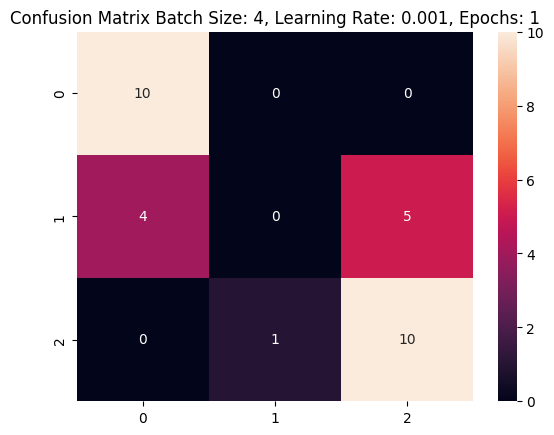

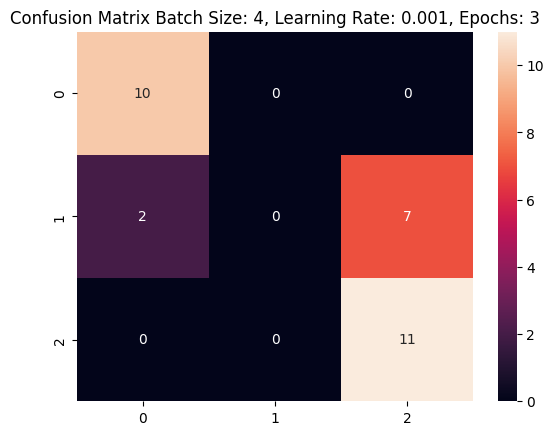

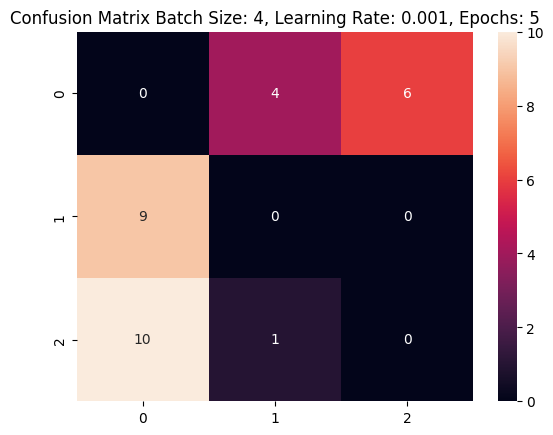

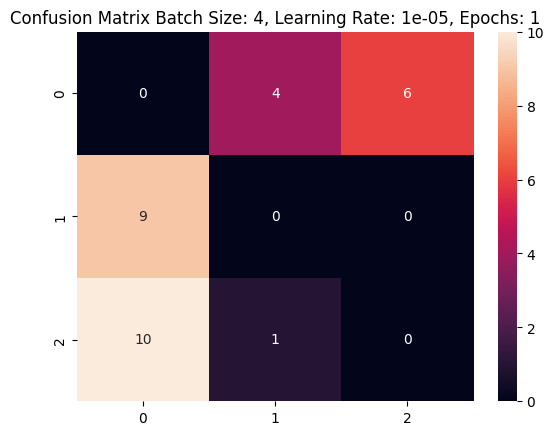

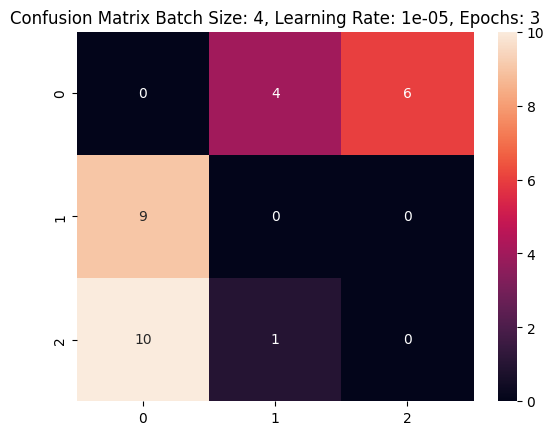

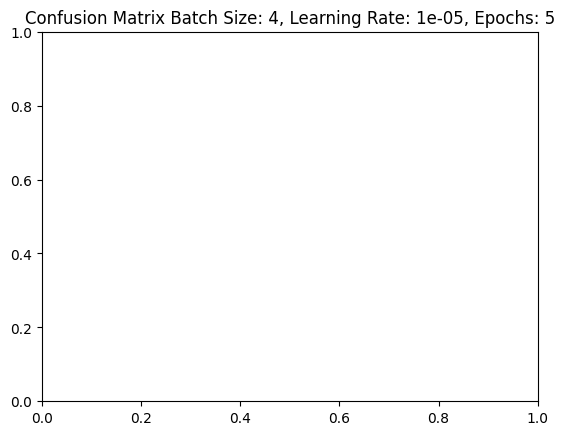

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for c in range(len(conf)):
    b = metrics[c]["batch"]
    lr = metrics[c]["lr"]
    e = metrics[c]["epochs"]

    sns.heatmap(conf[c], annot=True)
    plt.show()
    plt.title(f"Confusion Matrix Batch Size: {b}, Learning Rate: {lr}, Epochs: {e}")

Automated Hyperparameter Search

In [36]:
# Grid Search

predi = TabularPredictor(
    label = "target",
    eval_metric = "accuracy",
    path = "model/grid",
    verbosity = 2,
)

hp_kwargs = {
    "num_trials": 6,
    "scheduler": "local",
    "searcher": "bayes",
}

predi.fit(
    train_data = X_train,
    hyperparameters = {"NN_TORCH": {
        "num_epochs": agco.space.Categorical(1,3,5),
        "learning_rate": agco.space.Categorical(1e-3, 1e-5),\
        "batch_size": agco.space.Categorical(2, 4),
        "activation": "relu",
        "optimizer": "adam",}},
    time_limit = 1000,
    presets = "medium_quality",
    verbosity = 2,
    raise_on_no_models_fitted = True,
    hyperparameter_tune_kwargs = hp_kwargs,
    ag_args_fit={"num_cpus":2}
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          96
Memory Avail:       327.74 GB / 334.56 GB (98.0%)
Disk Space Avail:   207.41 GB / 225.33 GB (92.0%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "/content/model/grid"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [0, 1, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type: 

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 6                |
+---------------------------------------------------+

View detailed results here: /content/model/grid/models/NeuralNetTorch
(autoscaler +38m40s) Error: No available node types can fulfill resource request {'CPU': 96.0}. Add suitable node types to this cluster to resolve this issue.


2025-02-26 17:52:04,164	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/model/grid/models/NeuralNetTorch' in 0.0063s.
2025-02-26 17:52:04,169	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 6 trial(s):
- 8ad848f7: FileNotFoundError('Could not fetch metrics for 8ad848f7: both result.json and progress.csv were not found at /content/model/grid/models/NeuralNetTorch/8ad848f7')
- 808b17b8: FileNotFoundError('Could not fetch metrics for 808b17b8: both result.json and progress.csv were not found at /content/model/grid/models/NeuralNetTorch/808b17b8')
- ecde0d8b: FileNotFoundError('Could not fetch metrics for ecde0d8b: both result.json and progress.csv were not found at /content/model/grid/models/NeuralNetTorch/ecde0d8b')
- a07efd36: FileNotFoundError('Could not fetch metrics for a07efd36: both result.json and progress.csv were not found at /content/model/grid/models/NeuralNetTorch/a07efd36')
- 98ea7154: FileNotFoundError('C

Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 978.87s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/98ea7154': 1.0}
	1.0	 = Validation score   (accuracy)
	0.1s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 21.34s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 4604.9 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/model/grid")


In [37]:
# Prediciting on the test data based on the bayes search

pre = predi.predict(X_test)

real = X_test["target"]
acc = accuracy_score(real, pre)
f1 = f1_score(real, pre, average="weighted")

print(f"Accuracy: {acc}, F1 Score: {f1}")

predi.fit_summary()

Accuracy: 0.9666666666666667, F1 Score: 0.966750208855472
*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch/98ea7154   1.000000    accuracy       0.003885  2.992275                0.003885           2.992275            1       True          5
1      WeightedEnsemble_L2   1.000000    accuracy       0.005212  3.089199                0.001327           0.096924            2       True          7
2  NeuralNetTorch/9a30a686   1.000000    accuracy       0.006024  2.569173                0.006024           2.569173            1       True          6
3  NeuralNetTorch/a07efd36   0.958333    accuracy       0.003669  2.473650                0.003669           2.473650            1       True          4
4  NeuralNetTorch/8ad848f7   0.875000    accuracy       0.004182  2.721317                0.004182           2.7213

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetTorch/8ad848f7': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/808b17b8': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/ecde0d8b': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/a07efd36': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/98ea7154': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/9a30a686': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch/8ad848f7': 0.875,
  'NeuralNetTorch/808b17b8': 0.6666666666666666,
  'NeuralNetTorch/ecde0d8b': 0.5,
  'NeuralNetTorch/a07efd36': 0.9583333333333334,
  'NeuralNetTorch/98ea7154': 1.0,
  'NeuralNetTorch/9a30a686': 1.0,
  'WeightedEnsemble_L2': 1.0},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'NeuralNetTorch/8ad848f7': ['NeuralNetTorch', '8ad848f7'],
  'NeuralNetTorch/808b17b8': ['NeuralNetTorch', '808b17b8'],
  'NeuralNetTorch/ecde0d8b': ['NeuralNetTorch', 'ecde0d8b'],
  'NeuralNetTorch/a07efd36': ['NeuralNetTorch', 'a07efd3

In [33]:
# Random Search

predi = TabularPredictor(
    label = "target",
    eval_metric = "accuracy",
    path = "model/random",
    verbosity = 2,
)

hp_kwargs = {
    "num_trials": 6,
    "scheduler": "local",
    "searcher": "random",
}

predi.fit(
    train_data = X_train,
    hyperparameters = {"NN_TORCH": {
        "num_epochs": agco.space.Categorical(1,3,5),
        "learning_rate": agco.space.Categorical(1e-3, 1e-5),\
        "batch_size": agco.space.Categorical(2, 4),
        "activation": "relu",
        "optimizer": "adam",}},
    time_limit = 1000,
    presets = "medium_quality",
    verbosity = 2,
    raise_on_no_models_fitted = True,
    hyperparameter_tune_kwargs = hp_kwargs,
    ag_args_fit={"num_cpus":2}
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          96
Memory Avail:       327.57 GB / 334.56 GB (97.9%)
Disk Space Avail:   207.44 GB / 225.33 GB (92.1%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "/content/model/random"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [0, 1, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 6                     |
+--------------------------------------------------------+

View detailed results here: /content/model/random/models/NeuralNetTorch
(autoscaler +30m29s) Error: No available node types can fulfill resource request {'CPU': 96.0}. Add suitable node types to this cluster to resolve this issue.


2025-02-26 17:44:09,313	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/model/random/models/NeuralNetTorch' in 0.0063s.
2025-02-26 17:44:09,319	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 6 trial(s):
- 3cf01_00000: FileNotFoundError('Could not fetch metrics for 3cf01_00000: both result.json and progress.csv were not found at /content/model/random/models/NeuralNetTorch/3cf01_00000')
- 3cf01_00001: FileNotFoundError('Could not fetch metrics for 3cf01_00001: both result.json and progress.csv were not found at /content/model/random/models/NeuralNetTorch/3cf01_00001')
- 3cf01_00002: FileNotFoundError('Could not fetch metrics for 3cf01_00002: both result.json and progress.csv were not found at /content/model/random/models/NeuralNetTorch/3cf01_00002')
- 3cf01_00003: FileNotFoundError('Could not fetch metrics for 3cf01_00003: both result.json and progress.csv were not found at /content/model/random/models/NeuralNetTorch/

Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 979.61s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/3cf01_00001': 1.0}
	0.9583	 = Validation score   (accuracy)
	0.0s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 20.6s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3166.7 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/model/random")


In [34]:
# Prediciting on the test data based on the random search

pre = predi.predict(X_test)

real = X_test["target"]
acc = accuracy_score(real, pre)
f1 = f1_score(real, pre, average="weighted")

print(f"Accuracy: {acc}, F1 Score: {f1}")

predi.fit_summary()

Accuracy: 0.9666666666666667, F1 Score: 0.966750208855472
*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch/3cf01_00001   0.958333    accuracy       0.006704  2.916555                0.006704           2.916555            1       True          2
1         WeightedEnsemble_L2   0.958333    accuracy       0.007579  2.920657                0.000875           0.004102            2       True          7
2  NeuralNetTorch/3cf01_00000   0.875000    accuracy       0.003527  2.601617                0.003527           2.601617            1       True          1
3  NeuralNetTorch/3cf01_00002   0.666667    accuracy       0.004193  3.320719                0.004193           3.320719            1       True          3
4  NeuralNetTorch/3cf01_00003   0.666667    accuracy       0.004497  3.258650                0.00449

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetTorch/3cf01_00000': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/3cf01_00001': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/3cf01_00002': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/3cf01_00003': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/3cf01_00004': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/3cf01_00005': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch/3cf01_00000': 0.875,
  'NeuralNetTorch/3cf01_00001': 0.9583333333333334,
  'NeuralNetTorch/3cf01_00002': 0.6666666666666666,
  'NeuralNetTorch/3cf01_00003': 0.6666666666666666,
  'NeuralNetTorch/3cf01_00004': 0.25,
  'NeuralNetTorch/3cf01_00005': 0.3333333333333333,
  'WeightedEnsemble_L2': 0.9583333333333334},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'NeuralNetTorch/3cf01_00000': ['NeuralNetTorch',
   '3cf01_00000'],
  'NeuralNetTorch/3cf01_00001': ['NeuralNetTorch', '3cf01_00001'],
  'NeuralNetTorch/3c

Grid is not a direct option in searcher in TabularPredictor, we used autogluon.searcher and then the predictor. Grid and HyperBand are not supported in the current version, hence we implemented them in another colab file.


